In [23]:
import optuna

from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_rank
from optuna.visualization.matplotlib import plot_slice
from optuna.visualization.matplotlib import plot_timeline

In [3]:
study = optuna.load_study(
        study_name="optm_test_manda_prod1c", storage="sqlite:///db.sqlite3")

In [36]:
study_name = 'optm_test_manda_prod1c'
storage_name = "sqlite:///{}.db".format(study_name)

study2 = optuna.load_study(
        storage=storage_name, study_name=study_name)


In [13]:
study

In [21]:
study2

In [37]:
trials1 = study.get_trials(deepcopy=True)
trials2 = study2.get_trials(deepcopy=True)

In [46]:
merged_study_name = 'merged_study2'
merged_storage_name = 'sqlite:///merged_study.db'

merged_study = optuna.create_study(study_name=merged_study_name, storage=merged_storage_name, load_if_exists=True)

[I 2024-08-23 19:31:49,507] A new study created in RDB with name: merged_study2


In [47]:
def add_trials_to_study(trials, study):
    for trial in trials:
        study.add_trial(trial)

# Add trials from the first study
add_trials_to_study(trials1, merged_study)

# Add trials from the second study
add_trials_to_study(trials2, merged_study)

In [48]:
merged_study

In [49]:
merged_study.best_trial

FrozenTrial(number=16, state=1, values=[0.0008389878712478094], datetime_start=datetime.datetime(2024, 8, 23, 18, 34, 44, 9092), datetime_complete=datetime.datetime(2024, 8, 23, 18, 56, 33, 452954), params={'learning_rate': 2.6699931232114095e-05, 'weight_decay': 0.00013183243694343358, 'epochs': 37}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'weight_decay': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'epochs': IntDistribution(high=50, log=False, low=10, step=1)}, trial_id=71, value=None)

In [50]:
study2.best_trial

FrozenTrial(number=7, state=1, values=[0.0008389878712478094], datetime_start=datetime.datetime(2024, 8, 23, 18, 34, 44, 9092), datetime_complete=datetime.datetime(2024, 8, 23, 18, 56, 33, 452954), params={'learning_rate': 2.6699931232114095e-05, 'weight_decay': 0.00013183243694343358, 'epochs': 37}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'weight_decay': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'epochs': IntDistribution(high=50, log=False, low=10, step=1)}, trial_id=8, value=None)

/tmp/ipykernel_3381/512080594.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  fig1 = plot_optimization_history(merged_study)


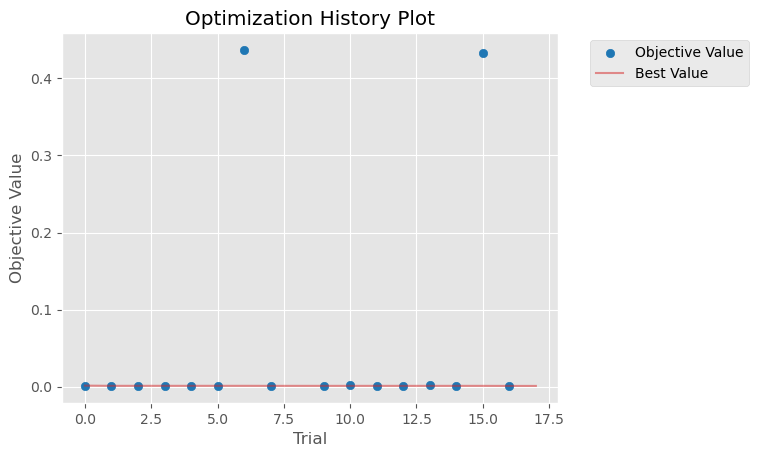

In [51]:
fig1 = plot_optimization_history(merged_study)
